In [6]:
# Code used for Analysis
import pandas as pd
import matplotlib.pyplot as plt
%store -r cg

In [9]:
cg = cg # Defining cg 

In [10]:
cg.head()

,game_order,event,site,white_title,white_rating_diff,white_elo,white,result,black,black_elo,black_rating_diff,black_title,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,magnus_result
0,105,Lichess Titled Arena,https://lichess.org/KEvLWfdH,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,-13.0,GM,-32,E47,Normal,60+0,2017.12.14,21:00:02,Standard,lost
1,104,Lichess Titled Arena,https://lichess.org/9YoOXtxp,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,-65.0,GM,-138,B01,Time forfeit,60+0,2017.12.14,21:01:10,Standard,lost
2,103,Lichess Titled Arena,https://lichess.org/yh0IxjPf,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,73.0,GM,-261,B01,Normal,60+0,2017.12.14,21:04:13,Standard,lost
3,102,Lichess Titled Arena,https://lichess.org/qcHWzltq,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,-16.0,IM,-189,A01,Normal,60+0,2017.12.14,21:06:30,Standard,lost
4,101,Lichess Titled Arena,https://lichess.org/HhV5RN5e,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,-4.0,NM,352,A01,Normal,60+0,2017.12.14,21:07:57,Standard,lost


In [13]:
cg.magnus_result.value_counts()

won     9129
lost    3245
draw    1068
Name: magnus_result, dtype: int64

In [18]:
cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()

won     4325
lost    1774
draw     601
Name: magnus_result, dtype: int64

In [16]:
cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()

won     4804
lost    1471
draw     467
Name: magnus_result, dtype: int64

In [32]:
cg[cg.utc_date.str[0:4]=='2017'].magnus_result.value_counts()

lost    94
draw    11
Name: magnus_result, dtype: int64

In [33]:
cg[cg.utc_date.str[0:4]=='2018'].magnus_result.value_counts()

won     929
lost    319
draw     82
Name: magnus_result, dtype: int64

In [34]:
cg[cg.utc_date.str[0:4]=='2019'].magnus_result.value_counts()

won     964
lost    230
draw    105
Name: magnus_result, dtype: int64

In [35]:
cg[cg.utc_date.str[0:4]=='2020'].magnus_result.value_counts()

won     4036
lost    1531
draw     484
Name: magnus_result, dtype: int64

In [36]:
cg[cg.utc_date.str[0:4]=='2021'].magnus_result.value_counts()

won     3200
lost    1071
draw     386
Name: magnus_result, dtype: int64

In [24]:
# Converts a number of wins, losses, and ties to a win percentage
def winpercentage(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

In [27]:
print('Overall win percentage: ',winpercentage(cg.magnus_result.value_counts()))
print('Black win percentage: ',winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()))
print('White win percentage: ',winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts()))
# Significant 5% difference between black and white

Overall win percentage:  0.7188662401428358
Black win percentage:  0.6903731343283582
White win percentage:  0.7471818451498072


<BarContainer object of 3 artists>

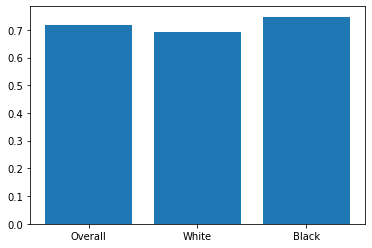

In [29]:
plt.bar(['Overall','White','Black'],[winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.black=='Magnus Carlsen'].magnus_result.value_counts()),winpercentage(cg[cg.white=='Magnus Carlsen'].magnus_result.value_counts())])

<BarContainer object of 5 artists>

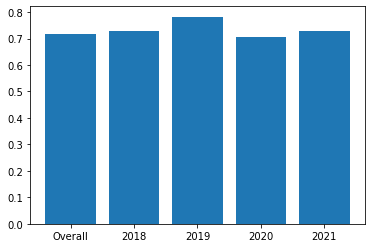

In [38]:
plt.bar(['Overall','2018','2019','2020','2021'],[winpercentage(cg.magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2018'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2019'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2020'].magnus_result.value_counts()),winpercentage(cg[cg.utc_date.str[0:4]=='2021'].magnus_result.value_counts())])

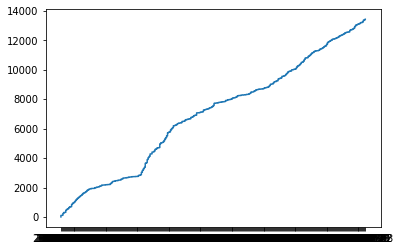

In [12]:
plt.plot(cg.utc_date,cg.index)